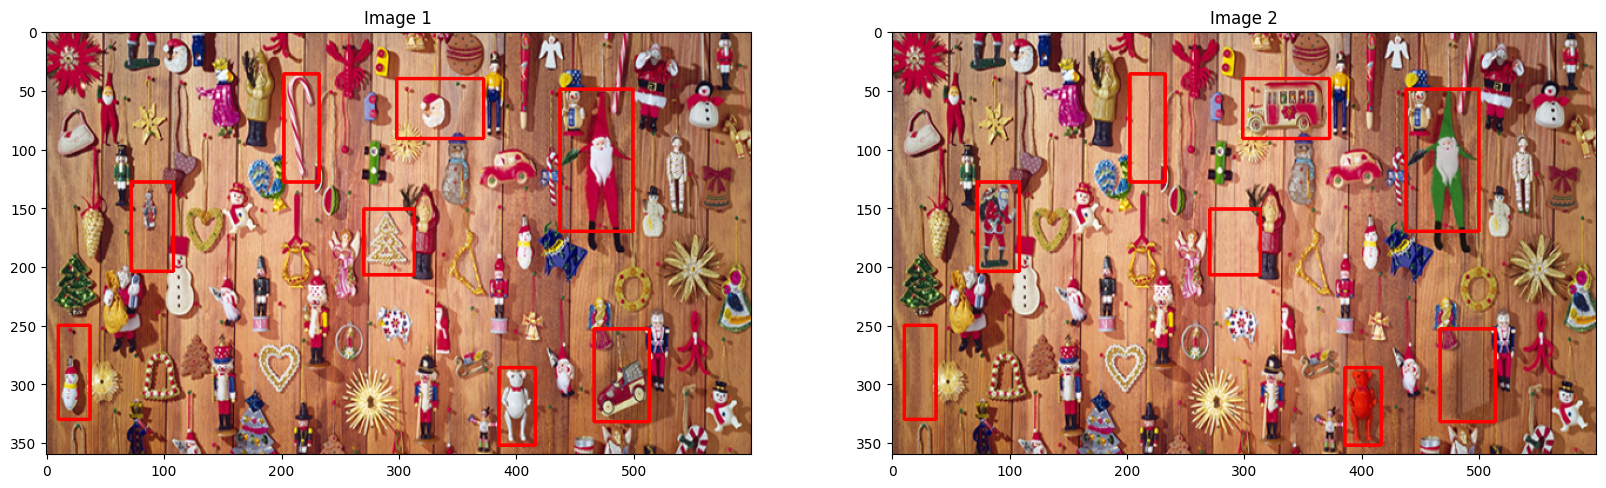

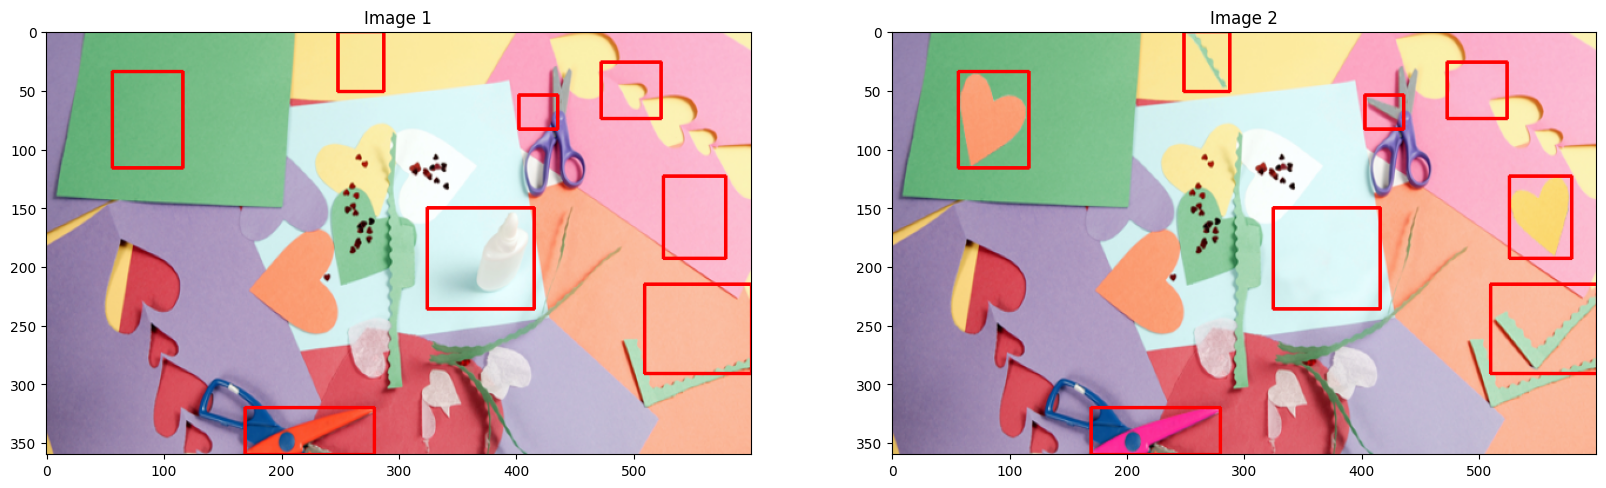

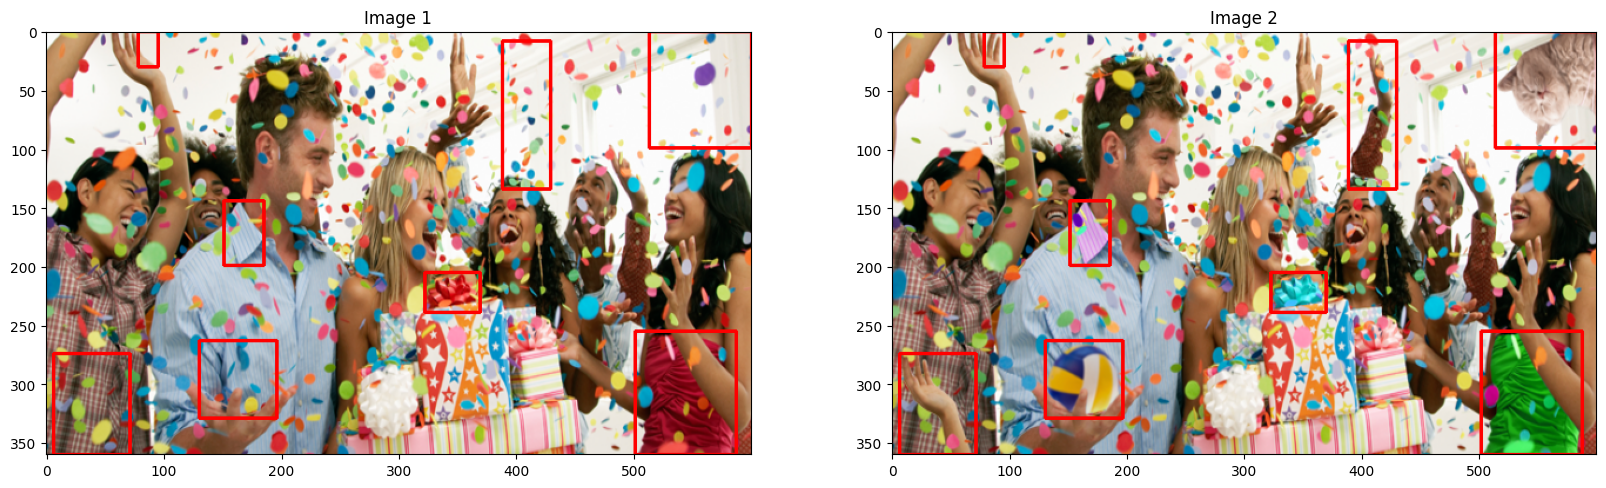

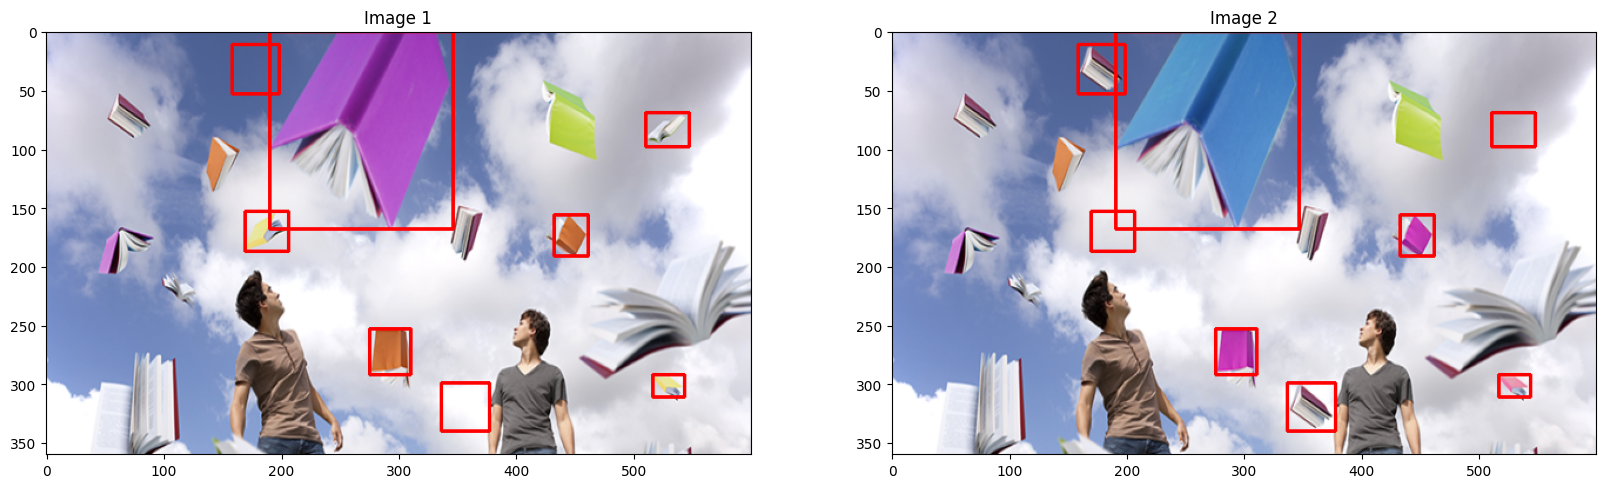

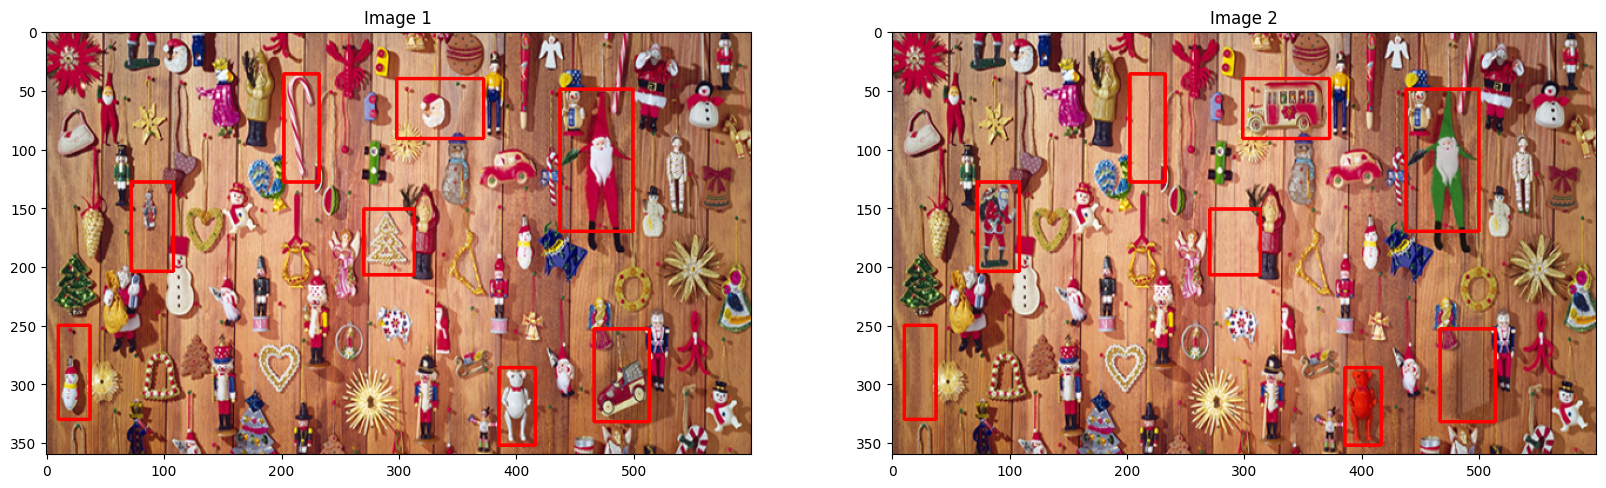

In [7]:
import cv2
import imutils
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# List of image pairs to compare
image_pairs = [('toys1.png', 'toys2.png'),
               ('paper1.png', 'paper2.png'),
               ('party1.png', 'party2.png'),
               ('ex1.png', 'ex2.png'),
              ('toys1.png', 'toys2.png')]

for img1_file, img2_file in image_pairs:
    # Load the two images
    img1 = cv2.imread(img1_file)
    img2 = cv2.imread(img2_file)
    # Resize images if necessary
    img1 = cv2.resize(img1, (600,360))
    img2 = cv2.resize(img2, (600,360))

    img_height = img1.shape[0]

    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Compute the absolute difference between the two grayscale images
    diff = cv2.absdiff(gray1, gray2)
    
    # Make the differences more apparent by blurring and then making all pixels black or white
    blur = cv2.GaussianBlur(diff, (5,5), cv2.BORDER_DEFAULT)
    (thresh, better_diff) = cv2.threshold(blur, 1, 255, cv2.THRESH_BINARY)
    
    # Apply threshold to the difference image
    thresh = cv2.threshold(better_diff, 25, 255, cv2.THRESH_BINARY)[1]

    # Calculate contours
    contours = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)

    # Draw bounding boxes around contours
    for contour in contours:
        if cv2.contourArea(contour) > 5:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img1, (x, y), (x+w, y+h), (0,0,255), 2)
            cv2.rectangle(img2, (x, y), (x+w, y+h), (0,0,255), 2)

    # Display the images with bounding boxes around differences
    # Show the images with bounding boxes around differences
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax1.set_title('Image 1')
    ax2.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    ax2.set_title('Image 2')
    plt.show()
